In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import ParameterGrid
from torch.utils.data import DataLoader
from vae.datasets_randomized import VolSurfaceDataSetRand, CustomBatchSampler
from vae.cvae_with_mem_randomized import CVAEMemRand
from vae.utils import *
from eval_scripts.eval_multi_day import *
import os

In [2]:
set_seeds(0)
torch.set_default_dtype(torch.float64)
num_epochs = 500
ctx_len = 3
start_day = 3
days_to_generate = 3997
num_vaes = 1000

In [3]:
data = np.load("data/vol_surface_with_ret.npz")
vol_surf_data = data["surface"]
ret_data = data["ret"]
level_data = data["levels"]
skew_data = data["skews"]
slope_data = data["slopes"]
ex_data = np.concatenate([ret_data[...,np.newaxis], skew_data[...,np.newaxis], slope_data[...,np.newaxis]], axis=-1)
print(ex_data.shape)

(5822, 3)


# no ex feats

(5300, 1000, 5, 5)


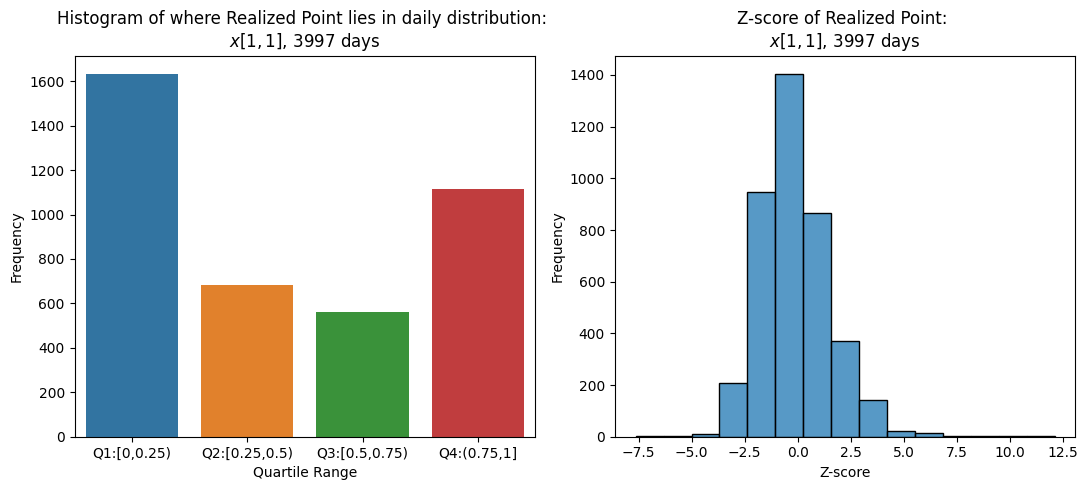

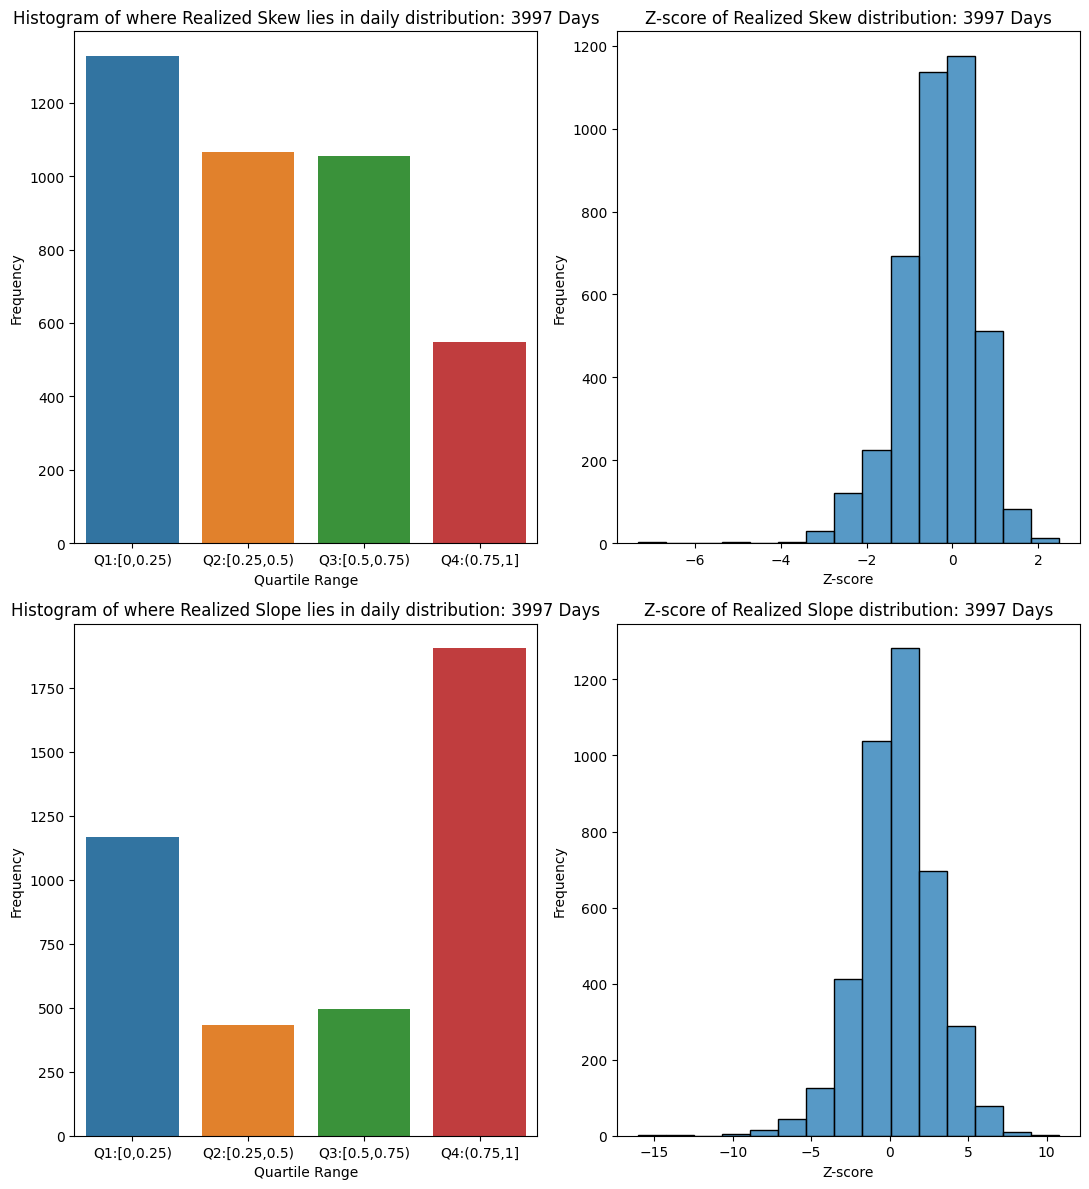

In [4]:
surfaces = np.load("test_spx/2023_08_27_simple/model_0_gen3.npy")
print(surfaces.shape)
_ = generate_multiple_surfaces_day_evolution_pre_gen(pre_generated_data={"surface": surfaces[:days_to_generate]},
                                             vol_surface_data = vol_surf_data[start_day:start_day+days_to_generate],
                                             ex_data=ex_data[start_day:start_day+days_to_generate],
                                             row=3, col=2, check_ex_feats=False, bin_count=15)
_ = skew_and_slope_daily_evolution_pre_gen(pre_generated_data={"surface": surfaces[:days_to_generate]},
                                           vol_surface_data=vol_surf_data[start_day:start_day+days_to_generate],
                                            bin_count=15)

# no loss on return

(5300, 1000, 5, 5)


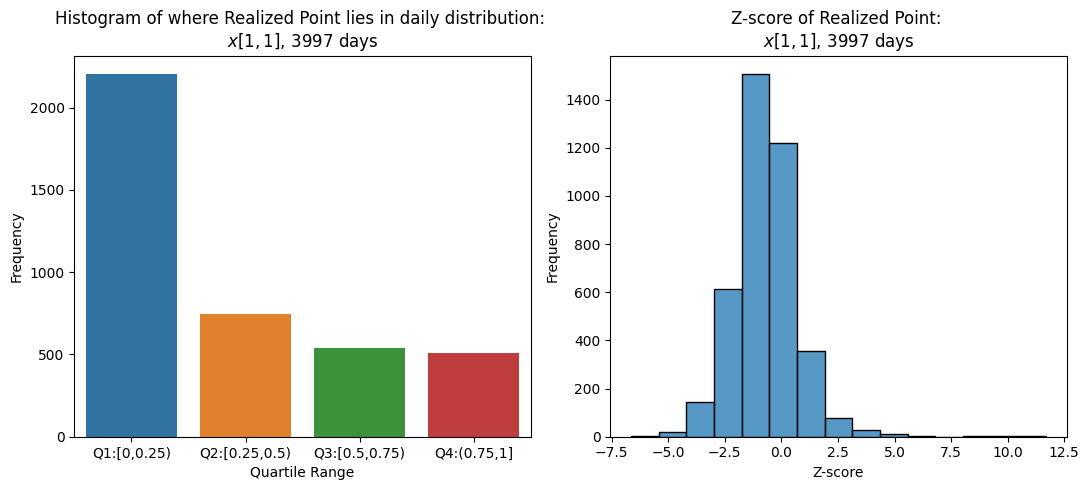

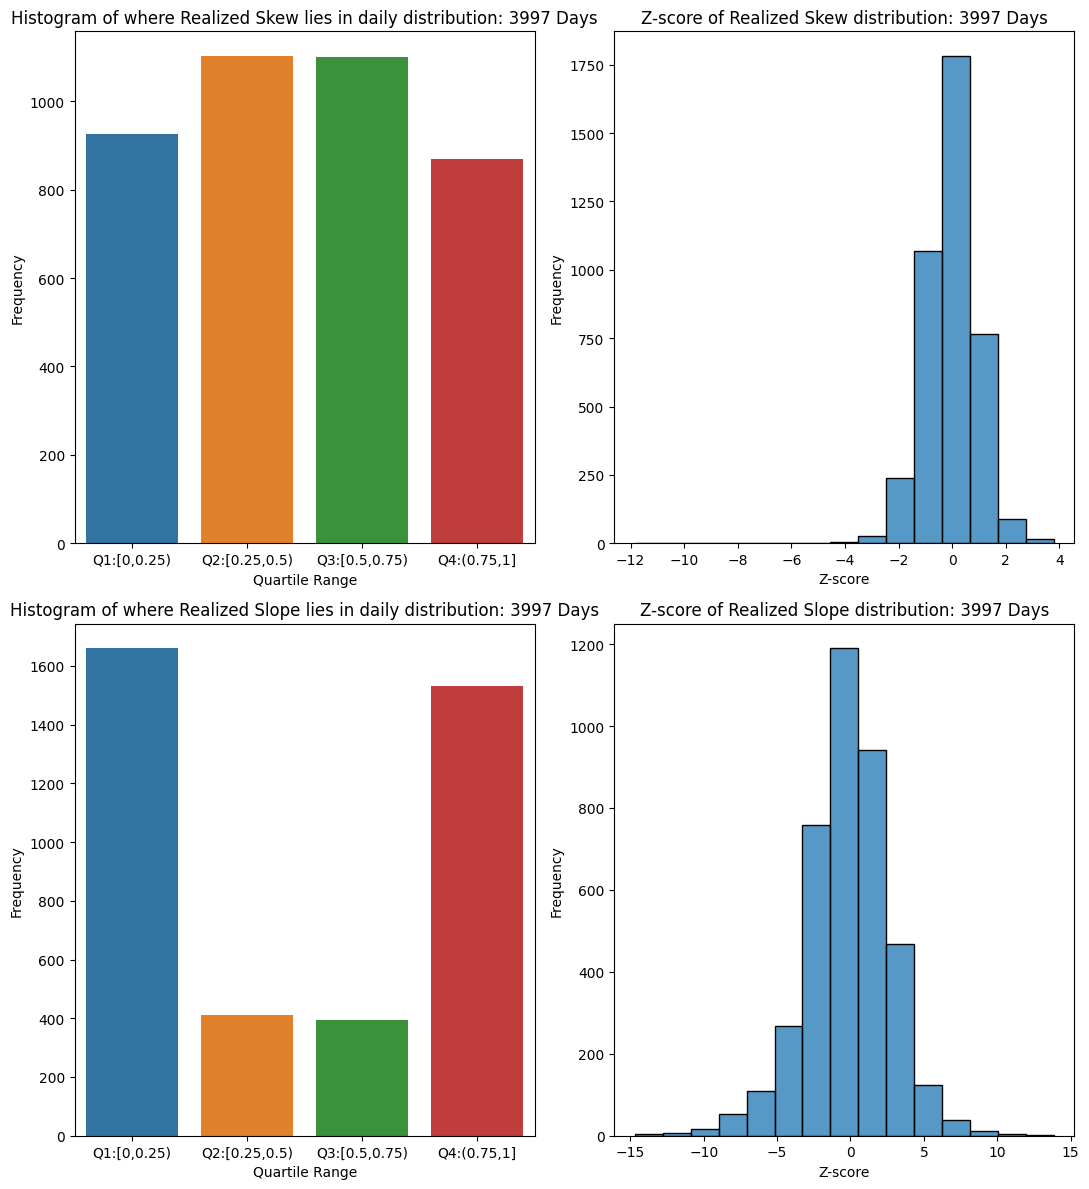

In [5]:
surfaces = np.load("test_spx/2023_08_27/model_0_gen3.npy")
print(surfaces.shape)
_ = generate_multiple_surfaces_day_evolution_pre_gen(pre_generated_data={"surface": surfaces[:days_to_generate]},
                                             vol_surface_data = vol_surf_data[start_day:start_day+days_to_generate],
                                             ex_data=ex_data[start_day:start_day+days_to_generate],
                                             row=3, col=2, check_ex_feats=False, bin_count=15)
_ = skew_and_slope_daily_evolution_pre_gen(pre_generated_data={"surface": surfaces[:days_to_generate]},
                                           vol_surface_data=vol_surf_data[start_day:start_day+days_to_generate],
                                            bin_count=15)

# loss on return

(5300, 1000, 5, 5)


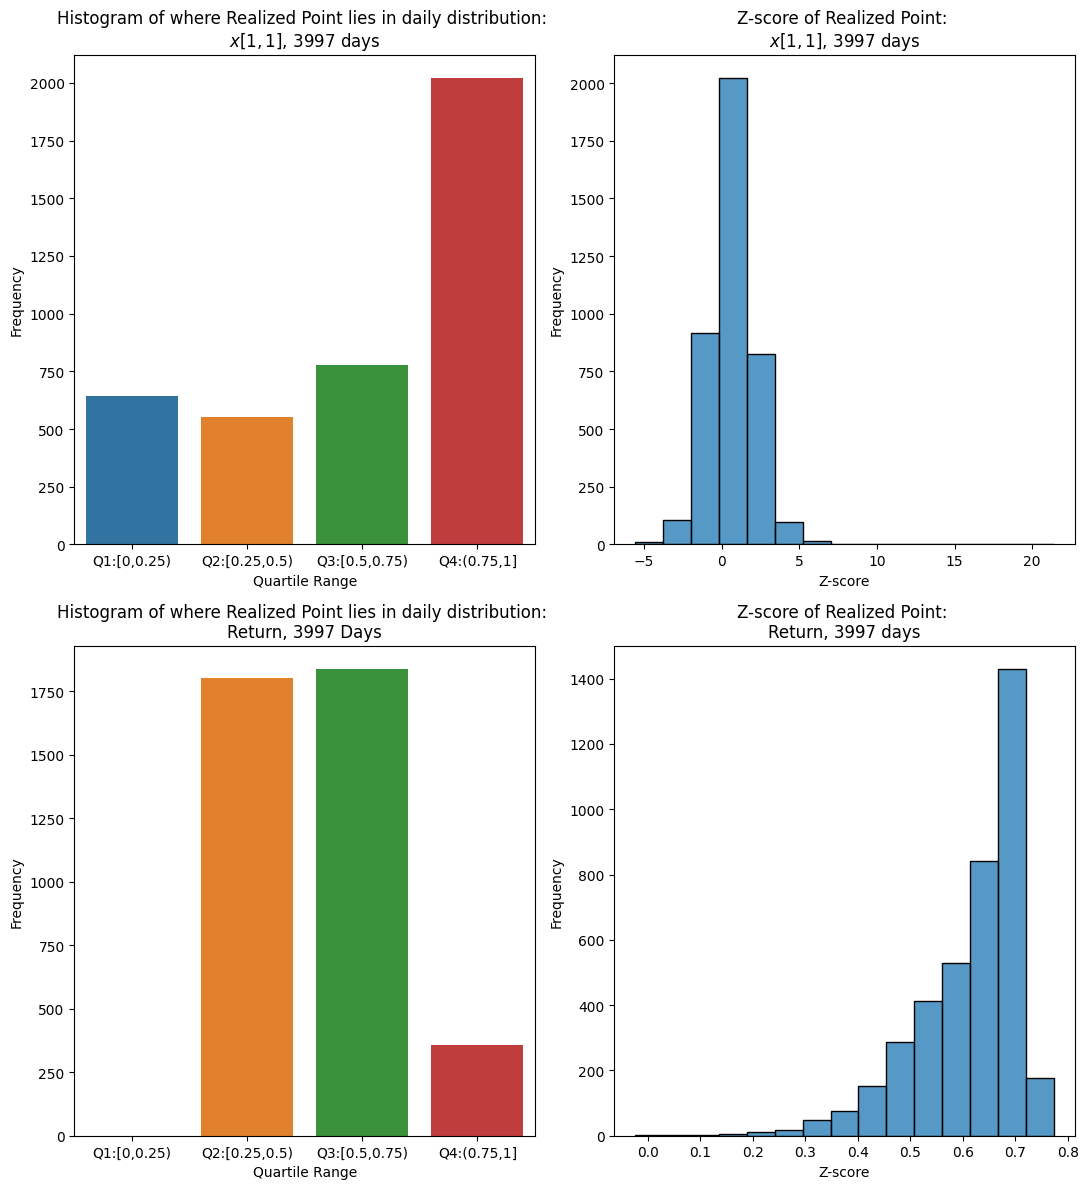

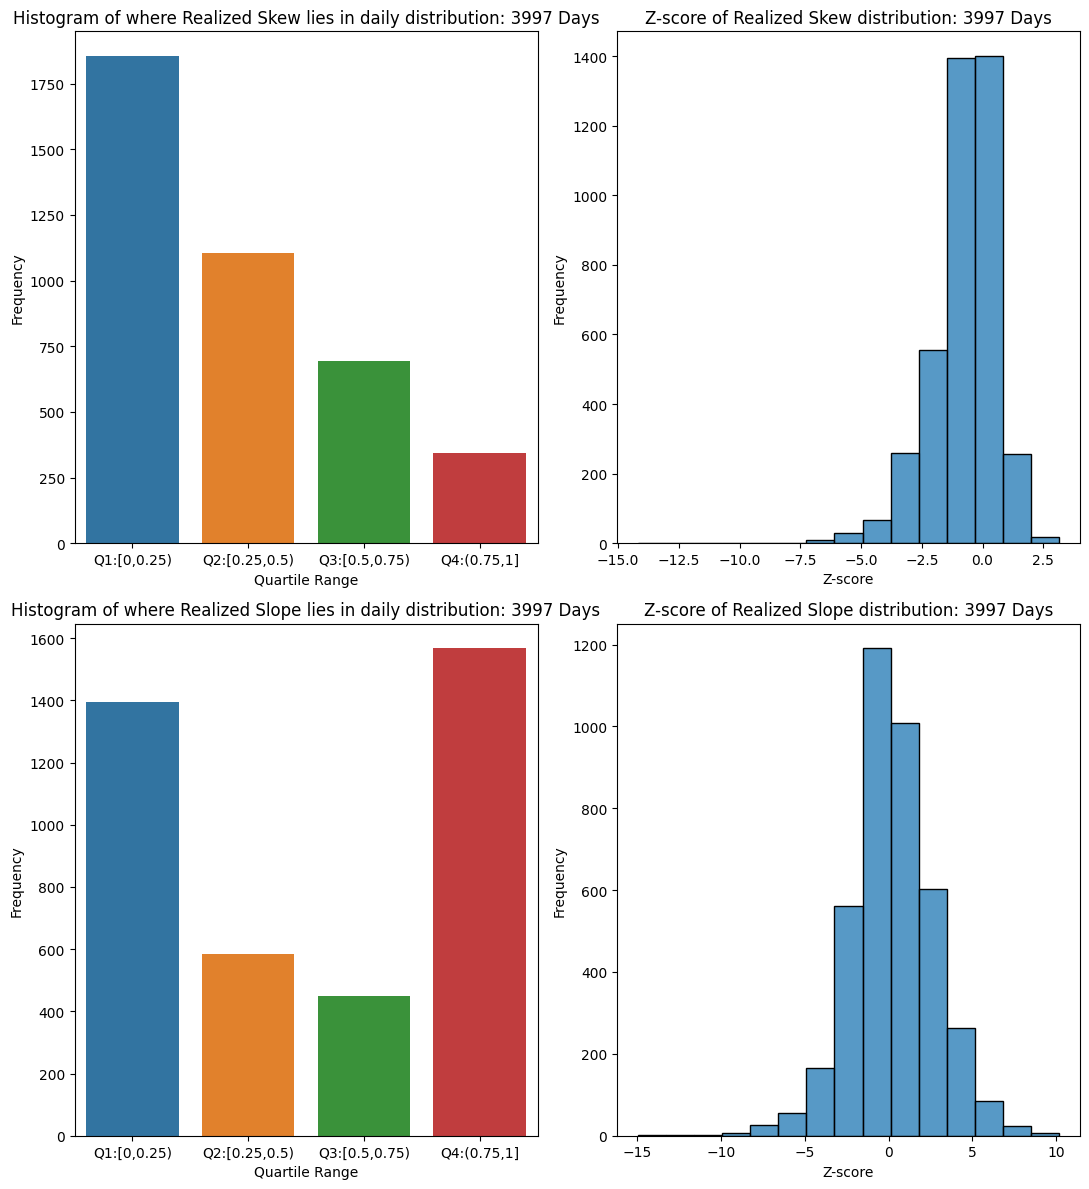

In [6]:
data = np.load("test_spx/2023_08_27/model_1_gen3.npz")
surfaces = data["surfaces"]
ex_feats = data["ex_feats"]
print(surfaces.shape)
_ = generate_multiple_surfaces_day_evolution_pre_gen(pre_generated_data={"surface": surfaces[:days_to_generate], 
                                                                         "ex_feats": ex_feats[:days_to_generate]},
                                             vol_surface_data = vol_surf_data[start_day:start_day+days_to_generate],
                                             ex_data=ex_data[start_day:start_day+days_to_generate, 0],
                                             row=3, col=2, check_ex_feats=True, bin_count=15)
_ = skew_and_slope_daily_evolution_pre_gen(pre_generated_data={"surface": surfaces[:days_to_generate]},
                                           vol_surface_data=vol_surf_data[start_day:start_day+days_to_generate],
                                            bin_count=15)